In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-11-25 15:22:54.772794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-25 15:22:54.772807: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# The Auto MPG dataset

## Get the data
`Using pandas`

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [4]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## Clean the data

In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
dataset = dataset.dropna()

In [9]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [11]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


The `"Origin"` column is categorical, not numeric. So the next step is to one-hot encode the values in the column with `pd.get_dummies`

In [12]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [13]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## Split dataset

In [14]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

## Inspect 

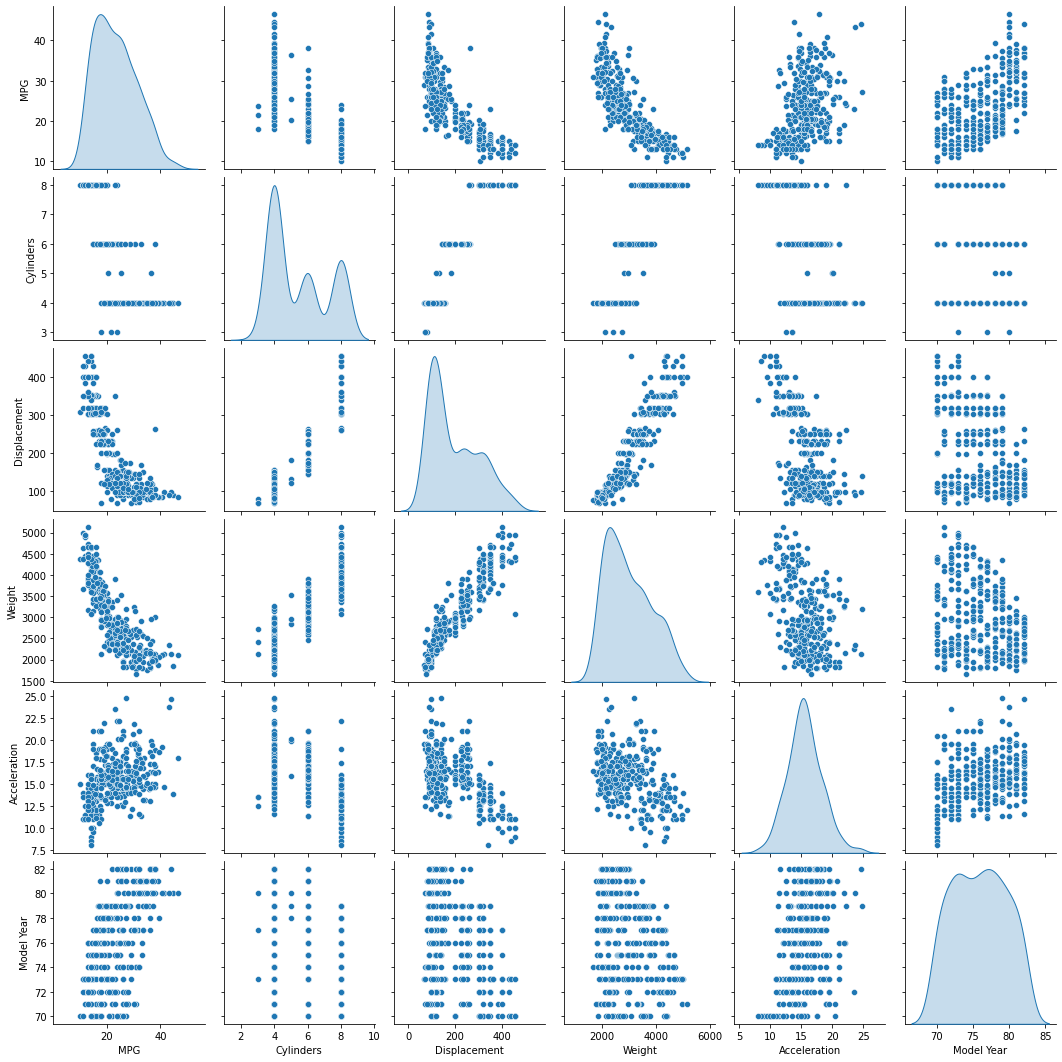

In [15]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Acceleration', 'Model Year']], diag_kind='kde')


In [16]:
train_dataset.describe(include = 'all').transpose()


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


## Split features from labels

In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("MPG")
test_labels = test_features.pop("MPG")

## Normalization

In [18]:
train_dataset.describe().transpose()[['mean', 'std']]


,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


Although a model might converge without feature normalization, normalization makes training much more stable.

### Normalizer layer
`tf.keras.layers.Normalization`

In [19]:
# Create Layer
normalizer = tf.keras.layers.Normalization(axis=-1)

Fit the state of the preprocessing layer to the data by calling `Normalization.adapt`

In [20]:
normalizer.adapt(np.array(train_features))

2022-11-25 15:22:59.536031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-25 15:22:59.536044: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-25 15:22:59.536056: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nsl54): /proc/driver/nvidia/version does not exist
2022-11-25 15:22:59.536188: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


When the layer is called, it returns the input data, with each feature independently normalized

In [22]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0


In [23]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


## Linear regression
Before building a deep neural network model, start with linear regression using one and several variables.

### Linear regression with one variable

Begin with a single-variable linear regression to predict `'MPG'` from `'Horsepower'`.
<br><br>
Training a model with `tf.keras` typically starts by defining the model architecture. Use a `tf.keras.Sequential` model, which represents a sequence of steps.
<br><br>
There are two steps in your single-variable linear regression model:
- Normalize the `'Horsepower'` input features using the `tf.keras.layers.Normalization` preprocessing layer.
- Apply a linear transformation **(y=mx+b)** to produce 1 output using a linear layer (`tf.keras.layers.Dense`).
<br><br>

The number of inputs can either be set by the `input_shape` argument, or automatically when the model is run for the first time.
<br><br>
First, create a NumPy array made of the `'Horsepower'` features. Then, instantiate the `tf.keras.layers.Normalization` and fit its state to the horsepower data.


In [24]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [25]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


Run the untrained model on the first 10 `'Horsepower'` values. The output won't be good, but notice that it has the expected shape of `(10, 1)`.

In [26]:
horsepower_model.predict(horsepower[:10])

array([[-1.182],
       [-0.668],
       [ 2.182],
       [-1.657],
       [-1.499],
       [-0.589],
       [-1.776],
       [-1.499],
       [-0.391],
       [-0.668]], dtype=float32)

Once the model is built, configure the training procedure using the Keras `Model.compile` method. The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`mean_absolute_error`) and how (using the `tf.keras.optimizers.Adam`).

In [27]:
horsepower_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        loss='mean_absolute_error')

Use Keras `Model.fit` to execute the training for 100 epochs

In [28]:
history = horsepower_model.fit(train_features['Horsepower'],
                              train_labels,
                              epochs=100,
                              verbose=1,
                              validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 22.8756 - val_loss: 22.9401
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 22.0647 - val_loss: 22.1397
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 21.2639 - val_loss: 21.3400
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 20.4609 - val_loss: 20.5399
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 19.6608 - val_loss: 19.7399
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 18.8643 - val_loss: 18.9397
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 18.0612 - val_loss: 18.1399
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 17.2661 - val_loss: 17.3429
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 16.4789 - val_loss: 16.5542
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 15.6973 - val_loss: 15.7656
Epoch 11

8/8 [==============================] - 0s 2ms/step - loss: 3.8065 - val_loss: 4.2031
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8054 - val_loss: 4.1867
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8035 - val_loss: 4.1919
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8095 - val_loss: 4.1678
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8039 - val_loss: 4.1720
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8075 - val_loss: 4.2121
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8047 - val_loss: 4.2099
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8050 - val_loss: 4.1950
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8037 - val_loss: 4.1785
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8063 - val_loss: 4.1672
Epoch 94/100
8/8 [===============

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804887,4.205958,95
96,3.804025,4.174752,96
97,3.808610,4.149148,97
98,3.806690,4.158072,98
99,3.804800,4.196187,99


In [30]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    

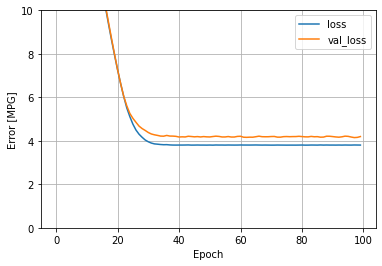

In [31]:
plot_loss(history)

In [32]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(test_features['Horsepower'],
                                                            test_labels, verbose=1)

3/3 [==============================] - 0s 753us/step - loss: 3.6533


Since this is a single variable regression, it's easy to view the model's predictions as a function of the input.

In [33]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [34]:
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

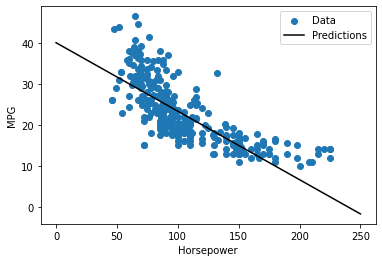

In [35]:
plot_horsepower(x, y)

### Linear regression with multiple inputs
This model still does the same **y=mx+b** except that *m* is a matrix and *b* is a vector.
<br><br>
Create a two-step Keras Sequential model again with the first layer being normalizer (`tf.keras.layers.Normalization(axis=-1)`) defined earlier and adapted to the whole dataset.

In [36]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [37]:
linear_model.predict(train_features[:10], verbose=1)

1/1 [==============================] - 0s 23ms/step


array([[ 0.72 ],
       [ 0.242],
       [-3.312],
       [ 0.737],
       [ 2.015],
       [-0.622],
       [ 2.318],
       [ 3.682],
       [-0.489],
       [ 1.857]], dtype=float32)

The `kernel` weights (the *m* in **y=mx+b**) have a shape of `(9, 1)`

In [38]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.146],
       [-0.633],
       [-0.566],
       [-0.272],
       [ 0.323],
       [-0.043],
       [ 0.712],
       [-0.008],
       [-0.44 ]], dtype=float32)>

Configure the model with Keras `Model.compile` and train with `Model.fit` for 100 epochs.

In [39]:
linear_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                    loss='mean_absolute_error')

In [40]:
history = linear_model.fit(train_features,
                          train_labels,
                          epochs=100,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 9ms/step - loss: 22.9689 - val_loss: 22.8332
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 22.1083 - val_loss: 22.1318
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 21.2665 - val_loss: 21.3930
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 20.4814 - val_loss: 20.6678
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 19.6394 - val_loss: 19.9553
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 18.8199 - val_loss: 19.2235
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 18.0061 - val_loss: 18.4846
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 17.1726 - val_loss: 17.7173
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 16.3824 - val_loss: 16.9815
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 15.5544 - val_loss: 16.2619
Epoch 11/

8/8 [==============================] - 0s 2ms/step - loss: 2.4743 - val_loss: 2.4606
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4755 - val_loss: 2.4794
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4715 - val_loss: 2.4767
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4770 - val_loss: 2.4776
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4769 - val_loss: 2.4926
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4653 - val_loss: 2.4688
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4692 - val_loss: 2.4791
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4708 - val_loss: 2.4661
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4719 - val_loss: 2.4775
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4722 - val_loss: 2.4526
Epoch 94/100
8/8 [===============

In [41]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,2.503992,2.475279,95
96,2.479347,2.524227,96
97,2.471456,2.477707,97
98,2.514649,2.493704,98
99,2.490339,2.525677,99


Using all the inputs in this regression model achieves a much lower training and validation error than the `horsepower_model`, which had one input.

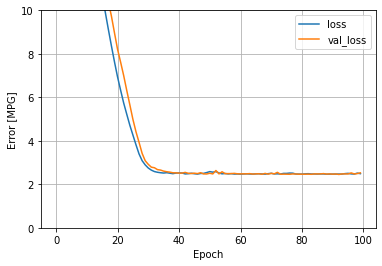

In [42]:
plot_loss(history)

In [43]:
test_results['linear_mode'] = linear_model.evaluate(test_features,
                                                   test_labels, verbose=1)

3/3 [==============================] - 0s 759us/step - loss: 2.5689


## Regression with a deep neural network
The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.
<br><br>
These models will contain a few more layers than the linear model:
- The normalization layer, as before (with `horsepower_normalizer` for a single-input model and `normalizer` for a multiple-input model).
- Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
- A linear `Dense` single-output layer.

<br><br>
Both models will use the same training procedure, so the `compile` method is included in the `build_and_compile_model` function below.

In [44]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),

        layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

### Regression using DNN and single input

In [45]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [46]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [47]:
history = dnn_horsepower_model.fit(train_features['Horsepower'],
                                  train_labels,
                                  validation_split=0.2,
                                  verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 9ms/step - loss: 23.1784 - val_loss: 23.5737
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 22.9534 - val_loss: 23.3267
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 22.7094 - val_loss: 23.0459
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 22.4143 - val_loss: 22.6857
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 22.0298 - val_loss: 22.2199
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 21.5384 - val_loss: 21.6254
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 20.8941 - val_loss: 20.8555
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 20.0794 - val_loss: 19.8718
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 19.0411 - val_loss: 18.6370
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 17.7352 - val_loss: 17.1718
Epoch 11/

8/8 [==============================] - 0s 2ms/step - loss: 3.2650 - val_loss: 3.7877
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 3.2734 - val_loss: 3.7806
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 3.2627 - val_loss: 3.7677
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 3.2619 - val_loss: 3.7739
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 3.2636 - val_loss: 3.7801
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 3.2623 - val_loss: 3.7788
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 3.2789 - val_loss: 3.7798
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 3.2586 - val_loss: 3.7533
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 3.2753 - val_loss: 3.7769
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 3.2628 - val_loss: 3.7712
Epoch 94/100
8/8 [===============

This model does slightly better than the linear single-input `horsepower_model`.

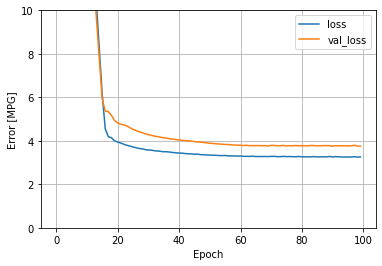

In [48]:
plot_loss(history)

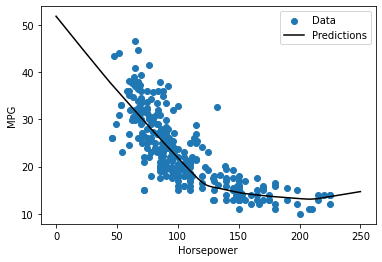

In [49]:
y =dnn_horsepower_model.predict(x)
plot_horsepower(x, y)

In [50]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(test_features['Horsepower'],
                                                                    test_labels, verbose=1)

3/3 [==============================] - 0s 1ms/step - loss: 2.9189


### Regression using DNN and multiple inputs

In [52]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_8 (Dense)             (None, 64)                640       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [53]:
history = dnn_model.fit(train_features,
                       train_labels,
                       validation_split=0.2,
                       verbose=1,
                       epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 9ms/step - loss: 23.1627 - val_loss: 23.2509
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 22.4302 - val_loss: 22.4747
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 21.6368 - val_loss: 21.5755
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 20.7328 - val_loss: 20.5066
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 19.6068 - val_loss: 19.1654
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 18.1769 - val_loss: 17.4355
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 16.3860 - val_loss: 15.4999
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 14.4727 - val_loss: 13.6970
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 12.4809 - val_loss: 11.7780
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 10.3550 - val_loss: 9.2765
Epoch 11/1

8/8 [==============================] - 0s 2ms/step - loss: 1.6585 - val_loss: 2.0665
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6509 - val_loss: 2.0839
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6416 - val_loss: 2.1081
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6479 - val_loss: 2.0681
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6331 - val_loss: 2.0617
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6521 - val_loss: 2.0647
Epoch 90/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6594 - val_loss: 2.0937
Epoch 91/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6246 - val_loss: 2.0707
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6388 - val_loss: 2.0752
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 1.6133 - val_loss: 2.0671
Epoch 94/100
8/8 [===============

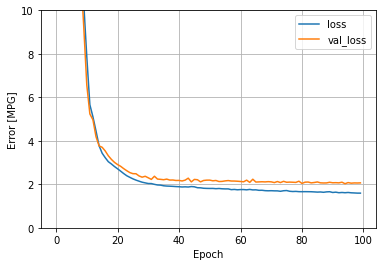

In [55]:
plot_loss(history)

In [57]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 869us/step - loss: 1.7236


## Performance

In [58]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.653322
linear_mode,2.568887
dnn_horsepower_model,2.918909
dnn_model,1.723599


In [59]:
test_predictions = dnn_model.predict(test_features).flatten()

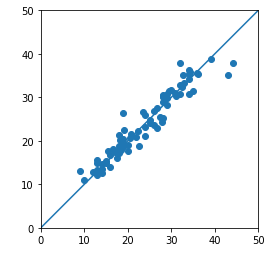

In [63]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]', color='white')
plt.ylabel('Predicted Values [MPG]', color='white')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)

_ = plt.plot(lims, lims)

The model predicts reasonably well.

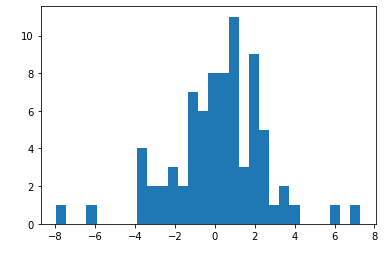

In [75]:
error = test_predictions - test_labels
plt.hist(error, bins=30)
plt.xlabel('Prediction Error [MPG]', color='white')

_ = plt.ylabel('Count', color='white')

In [76]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


2022-11-25 15:45:12.924197: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [77]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(test_features,
                                            test_labels, verbose=1)

3/3 [==============================] - 0s 1ms/step - loss: 1.7236


In [79]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.653322
linear_mode,2.568887
dnn_horsepower_model,2.918909
dnn_model,1.723599
reloaded,1.723599


# Conclusion
- **Mean squared error (MSE)** (`tf.keras.losses.MeanSquaredError`) and **mean absolute error (MAE)** (`tf.keras.losses.MeanAbsoluteError`) are common loss functions used for regression problems. MAE is less sensitive to outliers. Different loss functions are used for classification problems.
- Similarly, evaluation metrics used for regression differ from classification.
- When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
- Overfitting is a common problem for DNN models, though it wasn't a problem for this tutorial.